In [6]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [7]:
from io import StringIO

import pandas as pd

from dobby.io import perkin_elmer

In [8]:
s = '''Plate A-E	c_1	c_2	c_3	c_4	c_5	c_6	c_7	c_8	c_9	c_10	c_11	c_12
A	6-Azauridine	cmpd	cmpd	cmpd	cmpd	cmpd	cmpd	cmpd	cmpd	cmpd	cmpd	DMSO
B	DMSO	cmpd	cmpd	cmpd	cmpd	cmpd	cmpd	cmpd	cmpd	cmpd	cmpd	DMSO
C	DMSO	cmpd	cmpd	cmpd	cmpd	cmpd	cmpd	cmpd	cmpd	cmpd	cmpd	DMSO
D	DMSO	cmpd	cmpd	cmpd	cmpd	cmpd	cmpd	cmpd	cmpd	cmpd	cmpd	DMSO
E	DMSO	cmpd	cmpd	cmpd	cmpd	cmpd	cmpd	cmpd	cmpd	cmpd	cmpd	DMSO
F	DMSO	cmpd	cmpd	cmpd	cmpd	cmpd	cmpd	cmpd	cmpd	cmpd	cmpd	DMSO
G	DMSO	cmpd	cmpd	cmpd	cmpd	cmpd	cmpd	cmpd	cmpd	cmpd	cmpd	DMSO
H	DMSO	cmpd	cmpd	cmpd	cmpd	cmpd	cmpd	cmpd	cmpd	cmpd	cmpd	Gedunin'''
plate_map = pd.read_csv(StringIO(s), sep='\t', index_col=0)
plate_map.columns = plate_map.columns.map(lambda x: x.split("_")[1].zfill(2))
plate_map

,01,02,03,04,05,06,07,08,09,10,11,12
Plate A-E,,,,,,,,,,,,
A,6-Azauridine,cmpd,cmpd,cmpd,cmpd,cmpd,cmpd,cmpd,cmpd,cmpd,cmpd,DMSO
B,DMSO,cmpd,cmpd,cmpd,cmpd,cmpd,cmpd,cmpd,cmpd,cmpd,cmpd,DMSO
C,DMSO,cmpd,cmpd,cmpd,cmpd,cmpd,cmpd,cmpd,cmpd,cmpd,cmpd,DMSO
D,DMSO,cmpd,cmpd,cmpd,cmpd,cmpd,cmpd,cmpd,cmpd,cmpd,cmpd,DMSO
E,DMSO,cmpd,cmpd,cmpd,cmpd,cmpd,cmpd,cmpd,cmpd,cmpd,cmpd,DMSO
F,DMSO,cmpd,cmpd,cmpd,cmpd,cmpd,cmpd,cmpd,cmpd,cmpd,cmpd,DMSO
G,DMSO,cmpd,cmpd,cmpd,cmpd,cmpd,cmpd,cmpd,cmpd,cmpd,cmpd,DMSO
H,DMSO,cmpd,cmpd,cmpd,cmpd,cmpd,cmpd,cmpd,cmpd,cmpd,cmpd,Gedunin


5

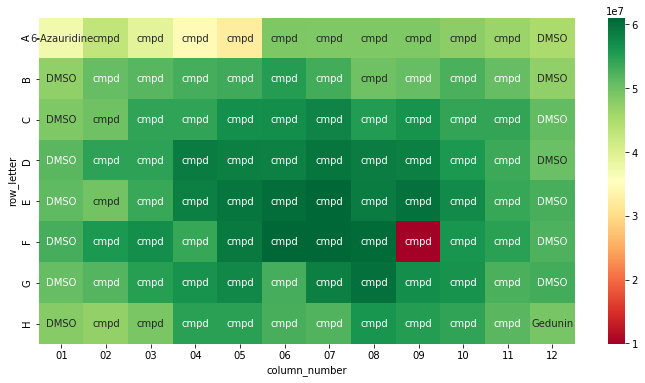

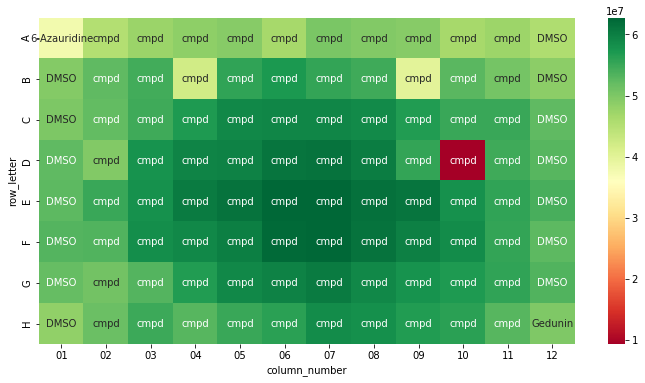

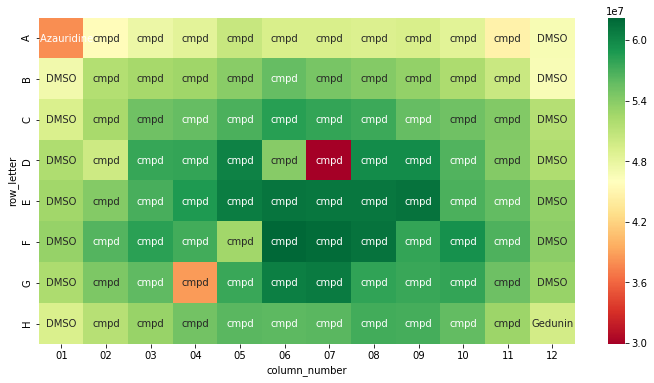

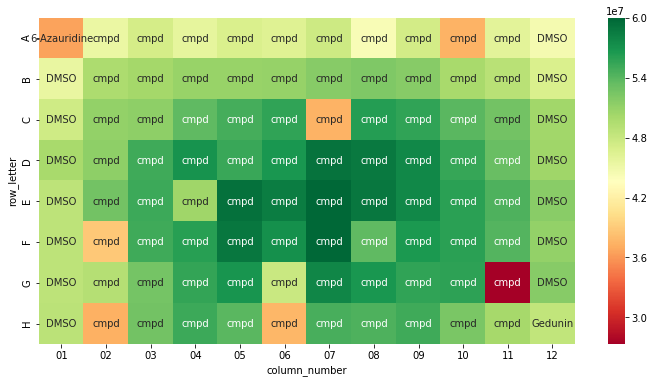

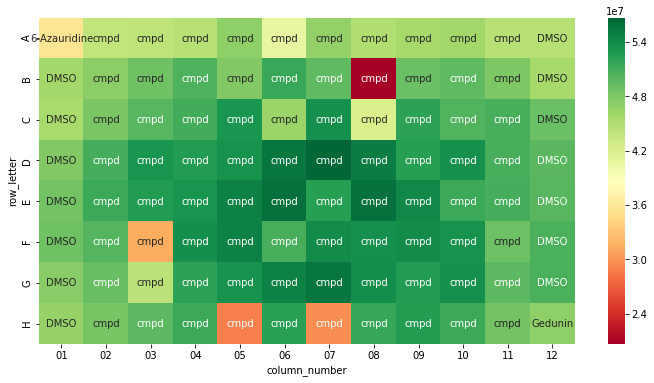

In [9]:
plates = perkin_elmer.parse("20190519-RK-48A-PRB-ABCDE-D2_CTG.csv", plate_map)

len(plates)

In [11]:
plate = plates[0]

In [14]:
# plate.__dict__

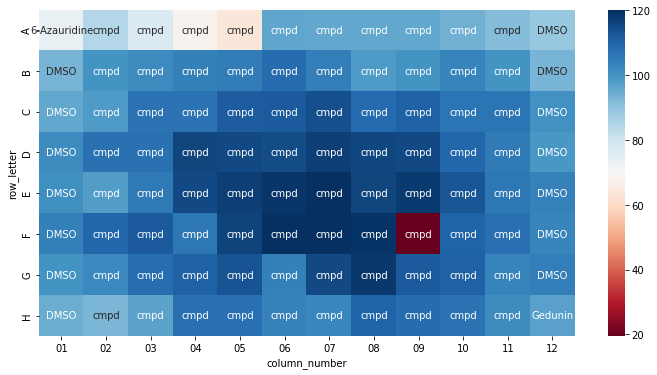

In [13]:
plate.plot(raw=False)

In [15]:
plate.tidy.head()

,column_number,row_letter,plate_map,well,raw_values,computed_values
0,01,A,6-Azauridine,A01,37287760,73.378935
1,01,B,DMSO,B01,47389840,93.258913
2,01,C,DMSO,C01,48781600,95.997771
3,01,D,DMSO,D01,51615040,101.573724
4,01,E,DMSO,E01,51105600,100.571192


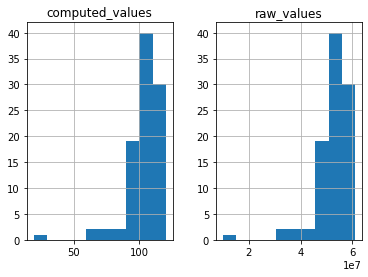

In [19]:
plate.tidy.hist();

In [21]:
plate.tidy.query('computed_values > 120')

,column_number,row_letter,plate_map,well,raw_values,computed_values
52,07,E,cmpd,E07,61059920,120.160392
53,07,F,cmpd,F07,61011240,120.064595


In [ ]:
plate.tidy.loc[plate.tidy.query('computed_values > 120')]

In [29]:
import string

In [30]:
string.ascii_uppercase

'ABCDEFGHIJKLMNOPQRSTUVWXYZ'

In [34]:
dfs = []

for letter, plate in zip(string.ascii_uppercase, plates):
    plate.tidy['plate_letter'] = letter
    dfs.append(plate.tidy)

combined_plates = pd.concat(dfs)
print(combined_plates.shape)
combined_plates.head()

(480, 7)


,column_number,row_letter,plate_map,well,raw_values,computed_values,plate_letter
0,01,A,6-Azauridine,A01,37287760,73.378935,A
1,01,B,DMSO,B01,47389840,93.258913,A
2,01,C,DMSO,C01,48781600,95.997771,A
3,01,D,DMSO,D01,51615040,101.573724,A
4,01,E,DMSO,E01,51105600,100.571192,A


In [35]:
5*96

480

In [25]:
mmv = pd.read_excel("/Users/olgabot/Downloads/MMV PandemicResponseBox_plate map.xlsx")
mmv.head()

,Rack,Position,MMV ID,Concentration,DISEASE AREA,SALT COEFF,SALT NAME,TRIVIAL NAME,SMILES,ChEMBL ID,LIT. REF,MW,FORMULA
0,PandemicResponseBox - Plate A,A02,MMV1634492,10 mM,ANTIFUNGALS,1.0,Nitric acid,Eberconazole,ClC1=C2C(=CC(=C1)Cl)CCC4=C(C2[N]3C=NC=C3)C=CC=C4,CHEMBL558722,NaN,392.2,C18 H14 Cl2 N2
1,PandemicResponseBox - Plate A,B02,MMV1782108,10 mM,ANTIFUNGALS,NaN,None,NaN,[S](=O)(=O)(NC1=NOC(=C1)C)C2=CC=C(CCCC)C=C2,CHEMBL1382726,WO 2004021997,294.4,C14 H18 N2 O3 S
2,PandemicResponseBox - Plate A,C02,MMV1634494,10 mM,ANTIFUNGALS,1.0,Hydrogen sulfate,Isavuconazonium,CNCC(=O)OCC1=CC=CN=C1N(C)C(=O)OC(C)[N+]2=C[N](...,CHEMBL1183349,NaN,814.9,C35 H35 F2 N8 O5 S
3,PandemicResponseBox - Plate A,D02,MMV1634386,10 mM,ANTIFUNGALS,NaN,None,NaN,FC1=C(C=CC(=C1)F)[C@](O)(C(F)(F)C3=NC=C(C2=CC=...,CHEMBL3311228,NaN,527.4,C23 H16 F7 N5 O2
4,PandemicResponseBox - Plate A,E02,MMV637528,10 mM,ANTIFUNGALS,NaN,None,Itraconazole,ClC1=C(C=CC(=C1)Cl)C6(OC(COC5=CC=C(N4CCN(C3=CC...,CHEMBL22587,NaN,705.6,C35H38Cl2N8O4


In [36]:
mmv['plate_letter'] = mmv.Rack.str.split(" - ").str[-1].str.split(" ").str[-1]
mmv.head()

,Rack,Position,MMV ID,Concentration,DISEASE AREA,SALT COEFF,SALT NAME,TRIVIAL NAME,SMILES,ChEMBL ID,LIT. REF,MW,FORMULA,plate_letter
0,PandemicResponseBox - Plate A,A02,MMV1634492,10 mM,ANTIFUNGALS,1.0,Nitric acid,Eberconazole,ClC1=C2C(=CC(=C1)Cl)CCC4=C(C2[N]3C=NC=C3)C=CC=C4,CHEMBL558722,NaN,392.2,C18 H14 Cl2 N2,A
1,PandemicResponseBox - Plate A,B02,MMV1782108,10 mM,ANTIFUNGALS,NaN,None,NaN,[S](=O)(=O)(NC1=NOC(=C1)C)C2=CC=C(CCCC)C=C2,CHEMBL1382726,WO 2004021997,294.4,C14 H18 N2 O3 S,A
2,PandemicResponseBox - Plate A,C02,MMV1634494,10 mM,ANTIFUNGALS,1.0,Hydrogen sulfate,Isavuconazonium,CNCC(=O)OCC1=CC=CN=C1N(C)C(=O)OC(C)[N+]2=C[N](...,CHEMBL1183349,NaN,814.9,C35 H35 F2 N8 O5 S,A
3,PandemicResponseBox - Plate A,D02,MMV1634386,10 mM,ANTIFUNGALS,NaN,None,NaN,FC1=C(C=CC(=C1)F)[C@](O)(C(F)(F)C3=NC=C(C2=CC=...,CHEMBL3311228,NaN,527.4,C23 H16 F7 N5 O2,A
4,PandemicResponseBox - Plate A,E02,MMV637528,10 mM,ANTIFUNGALS,NaN,None,Itraconazole,ClC1=C(C=CC(=C1)Cl)C6(OC(COC5=CC=C(N4CCN(C3=CC...,CHEMBL22587,NaN,705.6,C35H38Cl2N8O4,A


In [40]:
left_on = ['well', 'plate_letter']
right_on = ['Position', 'plate_letter']

plates_with_mmv = combined_plates.merge(mmv, left_on=left_on, right_on=right_on, how='outer')
print(plates_with_mmv.shape)
plates_with_mmv.head()

(484, 20)


,column_number,row_letter,plate_map,well,raw_values,computed_values,plate_letter,Rack,Position,MMV ID,Concentration,DISEASE AREA,SALT COEFF,SALT NAME,TRIVIAL NAME,SMILES,ChEMBL ID,LIT. REF,MW,FORMULA
0,01,A,6-Azauridine,A01,37287760.0,73.378935,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01,B,DMSO,B01,47389840.0,93.258913,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,01,C,DMSO,C01,48781600.0,95.997771,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,01,D,DMSO,D01,51615040.0,101.573724,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01,E,DMSO,E01,51105600.0,100.571192,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
plates_with_mmv.head(20)

,column_number,row_letter,plate_map,well,raw_values,computed_values,plate_letter,Rack,Position,MMV ID,Concentration,DISEASE AREA,SALT COEFF,SALT NAME,TRIVIAL NAME,SMILES,ChEMBL ID,LIT. REF,MW,FORMULA
0,01,A,6-Azauridine,A01,37287760.0,73.378935,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01,B,DMSO,B01,47389840.0,93.258913,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,01,C,DMSO,C01,48781600.0,95.997771,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,01,D,DMSO,D01,51615040.0,101.573724,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01,E,DMSO,E01,51105600.0,100.571192,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,01,F,DMSO,F01,52878080.0,104.059272,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,01,G,DMSO,G01,50826520.0,100.021988,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,01,H,DMSO,H01,48274280.0,94.999411,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,02,A,cmpd,A02,43016440.0,84.652458,A,PandemicResponseBox - Plate A,A02,MMV1634492,10 mM,ANTIFUNGALS,1.0,Nitric acid,Eberconazole,ClC1=C2C(=CC(=C1)Cl)CCC4=C(C2[N]3C=NC=C3)C=CC=C4,CHEMBL558722,NaN,392.2,C18 H14 Cl2 N2
9,02,B,cmpd,B02,50807280.0,99.984126,A,PandemicResponseBox - Plate A,B02,MMV1782108,10 mM,ANTIFUNGALS,NaN,None,NaN,[S](=O)(=O)(NC1=NOC(=C1)C)C2=CC=C(CCCC)C=C2,CHEMBL1382726,WO 2004021997,294.4,C14 H18 N2 O3 S


In [44]:
plates_with_mmv.query("computed_values > 120")

,column_number,row_letter,plate_map,well,raw_values,computed_values,plate_letter,Rack,Position,MMV ID,Concentration,DISEASE AREA,SALT COEFF,SALT NAME,TRIVIAL NAME,SMILES,ChEMBL ID,LIT. REF,MW,FORMULA
52,07,E,cmpd,E07,61059920.0,120.160392,A,PandemicResponseBox - Plate A,E07,MMV1634557,10 mM,ANTIBACTERIALS,NaN,None,NaN,O=C5C1=C(NC4=C(N(C1C3=CC(=C(OCC2=CC=CC=C2)C=C3...,NaN,WO 2007026024,496.6,C31 H32 N2 O4
53,07,F,cmpd,F07,61011240.0,120.064595,A,PandemicResponseBox - Plate A,F07,MMV030787,10 mM,ANTIBACTERIALS,NaN,None,Revaprazan,FC1=CC=C(C=C1)NC2=NC(N3C(C)C4=C(CC3)C=CC=C4)=C...,CHEMBL1618279,WO 2007064128,362.4,C22H23FN4
140,06,E,cmpd,E06,62654120.0,120.412539,B,PandemicResponseBox - Plate B,E06,MMV1593542,10 mM,ANTIBACTERIALS,NaN,None,NaN,OCCCCn1cnc2c(O)nc(NCc3ccc(Cl)c(Cl)c3)nc12,CHEMBL182072,NaN,382.2,C16 H17 Cl2 N5 O2
141,06,F,cmpd,F06,62443680.0,120.008103,B,PandemicResponseBox - Plate B,F06,MMV1593538,10 mM,ANTIBACTERIALS,1.0,Hydrochloric acid,NaN,NC1(CCP(=O)(O)CC1)C(=O)O,CHEMBL3120859,NaN,229.6,C6 H12 N O4 P
148,07,E,cmpd,E07,62736840.0,120.571515,B,PandemicResponseBox - Plate B,E07,MMV1579844,10 mM,ANTIBACTERIALS,1.0,Hydrochloric acid,NaN,NC(=N)c1ccc(COc2ccc(Cl)cc2)cc1,CHEMBL2418045,NaN,297.2,C14 H13 Cl N2 O
149,07,F,cmpd,F07,62731800.0,120.561829,B,PandemicResponseBox - Plate B,F07,MMV141011,10 mM,ANTIBACTERIALS,NaN,None,NaN,Clc1cccc(c1)c2oc(nn2)c3ccccc3,CHEMBL1549430,NaN,256.7,C14H9ClN2O
237,06,F,cmpd,F06,62197280.0,120.954360,C,PandemicResponseBox - Plate C,F06,MMV1581549,10 mM,ANTIBACTERIALS,NaN,None,NaN,CCc1nc(N)nc(N)c1C#CCc2ccccc2,CHEMBL501263,NaN,252.3,C15 H16 N4
245,07,F,cmpd,F07,61869200.0,120.316346,C,PandemicResponseBox - Plate C,F07,MMV002260,10 mM,ANTIBACTERIALS,NaN,None,Valdecoxib,Cc1onc(c2ccccc2)c1c3ccc(cc3)S(=O)(=O)N,CHEMBL865,NaN,314.4,C16H14N2O3S
324,05,E,cmpd,E05,59301280.0,120.302873,D,PandemicResponseBox - Plate D,E05,MMV1645152,10 mM,ANTIVIRALS,NaN,None,NaN,BrC1=C([NH]C(=N[C]1=O)N)C2=CC(=CC=C2)Cl,CHEMBL56530,NaN,300.5,C10 H7 Br Cl N3 O
340,07,E,cmpd,E07,60000960.0,121.722294,D,PandemicResponseBox - Plate D,E07,MMV1782107,10 mM,ANTIVIRALS,NaN,None,NaN,O=[C]2[N](C=C(NC1=CC=CC=C1)[C]([NH]2)=O)CC3=CC...,CHEMBL1290407,NaN,385.4,C23 H19 N3 O3


In [47]:
pandemic_response = pd.read_excel("/Users/olgabot/Downloads/Pandemic_Response_Box_list_of compounds_March2019.xlsx", index_col=0)
pandemic_response.head()

,DISEASE AREA,SALT COEFF,SALT NAME,CHEM NAME,TRIVIAL NAME,STRUCTURE,SMILES,ChEMBL ID,LIT. REF,COMMENTS,MW,FORMULA,PSA,ALOGP,RULEOF5
MMV ID,,,,,,,,,,,,,,,
MMV214956,ANTIVIRALS,NaN,None,"N-(4-bromophenyl)-2-(6-oxo-[1,3]thiazolo[3,2-b...",NaN,BrC3=CC=C(NC(=O)CC2SC1=NC=N[N]1C2=O)C=C3,BrC3=CC=C(NC(=O)CC2SC1=NC=N[N]1C2=O)C=C3,CHEMBL243652,"US 8563580,WO 2010039538",NaN,353.20,C12H9BrN4O2S,102.20,2.12,4.0
MMV1634557,ANTIBACTERIALS,NaN,None,5-acetyl-6-(3-methoxy-4-phenylmethoxyphenyl)-9...,NaN,O=C5C1=C(NC4=C(N(C1C3=CC(=C(OCC2=CC=CC=C2)C=C3...,O=C5C1=C(NC4=C(N(C1C3=CC(=C(OCC2=CC=CC=C2)C=C3...,NaN,WO 2007026024,NaN,496.60,C31 H32 N2 O4,67.87,4.91,4.0
MMV002350,ANTIFUNGALS,1,Hydrochloric acid,"1-ethyl-6,8-difluoro-7-(3-methylpiperazin-1-yl...",Lomefloxacin,FC2=C(N1CC(NCC1)C)C(=CC3=C2[N](C=C(C(=O)O)[C]3...,FC2=C(N1CC(NCC1)C)C(=CC3=C2[N](C=C(C(=O)O)[C]3...,CHEMBL561,NaN,AF&AV activity also reported,387.86,C17H19F2N3O3,72.88,-0.83,4.0
MMV1634492,ANTIFUNGALS,1,Nitric acid,"1-(4,6-dichloro-2-tricyclo[9.4.0.03,8]pentadec...",Eberconazole,ClC1=C2C(=CC(=C1)Cl)CCC4=C(C2[N]3C=NC=C3)C=CC=C4,ClC1=C2C(=CC(=C1)Cl)CCC4=C(C2[N]3C=NC=C3)C=CC=C4,CHEMBL558722,NaN,NaN,392.21,C18 H14 Cl2 N2,17.82,5.05,3.0
MMV1634395,ANTIVIRALS,NaN,None,4-(cyclobutylmethoxy)-3-ethyl-6-fluoro-1H-quin...,NaN,FC3=CC1=C([NH][C](C(=C1OCC2CCC2)CC)=O)C=C3,FC3=CC1=C([NH][C](C(=C1OCC2CCC2)CC)=O)C=C3,CHEMBL188868,"Journal of Medicinal Chemistry (2004), 47(24)...",NaN,275.30,C16 H18 F N O2,38.33,3.33,4.0


In [48]:
pandemic_response_subset = pandemic_response.loc[:,pandemic_response.columns.difference(plates_with_mmv.columns)]
pandemic_response_subset.head()

,ALOGP,CHEM NAME,COMMENTS,PSA,RULEOF5,STRUCTURE
MMV ID,,,,,,
MMV214956,2.12,"N-(4-bromophenyl)-2-(6-oxo-[1,3]thiazolo[3,2-b...",NaN,102.20,4.0,BrC3=CC=C(NC(=O)CC2SC1=NC=N[N]1C2=O)C=C3
MMV1634557,4.91,5-acetyl-6-(3-methoxy-4-phenylmethoxyphenyl)-9...,NaN,67.87,4.0,O=C5C1=C(NC4=C(N(C1C3=CC(=C(OCC2=CC=CC=C2)C=C3...
MMV002350,-0.83,"1-ethyl-6,8-difluoro-7-(3-methylpiperazin-1-yl...",AF&AV activity also reported,72.88,4.0,FC2=C(N1CC(NCC1)C)C(=CC3=C2[N](C=C(C(=O)O)[C]3...
MMV1634492,5.05,"1-(4,6-dichloro-2-tricyclo[9.4.0.03,8]pentadec...",NaN,17.82,3.0,ClC1=C2C(=CC(=C1)Cl)CCC4=C(C2[N]3C=NC=C3)C=CC=C4
MMV1634395,3.33,4-(cyclobutylmethoxy)-3-ethyl-6-fluoro-1H-quin...,NaN,38.33,4.0,FC3=CC1=C([NH][C](C(=C1OCC2CCC2)CC)=O)C=C3


In [49]:
combined_plate_mmv_pandemic = plates_with_mmv.join(pandemic_response_subset, on='MMV ID')
print(combined_plate_mmv_pandemic.shape)
combined_plate_mmv_pandemic.head()

(484, 26)


,column_number,row_letter,plate_map,well,raw_values,computed_values,plate_letter,Rack,Position,MMV ID,...,ChEMBL ID,LIT. REF,MW,FORMULA,ALOGP,CHEM NAME,COMMENTS,PSA,RULEOF5,STRUCTURE
0,01,A,6-Azauridine,A01,37287760.0,73.378935,A,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01,B,DMSO,B01,47389840.0,93.258913,A,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,01,C,DMSO,C01,48781600.0,95.997771,A,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,01,D,DMSO,D01,51615040.0,101.573724,A,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01,E,DMSO,E01,51105600.0,100.571192,A,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


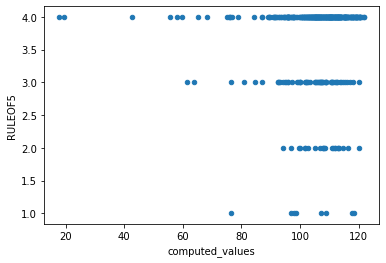

In [52]:
combined_plate_mmv_pandemic.plot('computed_values', 'RULEOF5', kind='scatter')

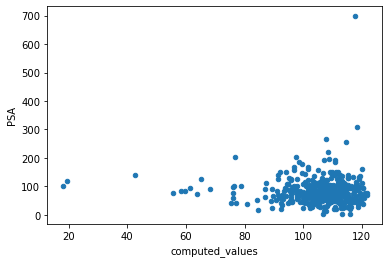

In [53]:
combined_plate_mmv_pandemic.plot('computed_values', 'PSA', kind='scatter')

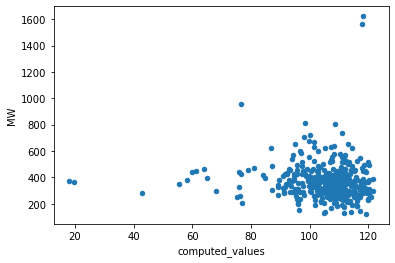

In [54]:
combined_plate_mmv_pandemic.plot('computed_values', 'MW', kind='scatter')